In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import plotly as plt
import math


In [32]:
data = pd.read_excel("C:\\Users\\shri shibi\\Desktop\\NewDAB103-dataset.xlsx")

In [33]:
### Treating missing values.

### Replacing missing values with mean and median according to the spread and outliers present in each features.

data.fillna({
    
    'Import Product Share (%)': data['Import Product Share (%)'].mean(),
    'AHS Weighted Average (%)': data['AHS Weighted Average (%)'].mean(),
    'AHS MaxRate (%)'         :  data['AHS MaxRate (%)'].mean(),
    'AHS MinRate (%)'         :  data['AHS MinRate (%)'].median(),
    'AHS SpecificDuty Imports (US$ Thousand)'         :  data['AHS SpecificDuty Imports (US$ Thousand)'].median(),
    'AHS Dutiable Imports (US$ Thousand)'             :  data['AHS Dutiable Imports (US$ Thousand)'].median(),
    'AHS Duty Free Imports (US$ Thousand)'             :  data['AHS Duty Free Imports (US$ Thousand)'].median(),
    'MFN Weighted Average (%)': data['MFN Weighted Average (%)'].mean(),
    
    'MFN MaxRate (%)'         :  data['MFN MaxRate (%)'].mean(),
    'MFN MinRate (%)'         :  data['MFN MinRate (%)'].median(),
    
    
    'MFN SpecificDuty Imports (US$ Thousand)'         :  data['MFN SpecificDuty Imports (US$ Thousand)'].median(),
    'MFN Dutiable Imports (US$ Thousand)'             :  data['MFN Dutiable Imports (US$ Thousand)'].median(),
    'MFN Duty Free Imports (US$ Thousand)'             :  data['MFN Duty Free Imports (US$ Thousand)'].median()
    
}
)

,Reporter Name,Partner_Name,Partner Name id,Year,Trade Flow,Product Group,Import (US$ Thousand),Import Product Share (%),AHS Weighted Average (%),AHS MaxRate (%),AHS MinRate (%),AHS SpecificDuty Imports (US$ Thousand),AHS Dutiable Imports (US$ Thousand),AHS Duty Free Imports (US$ Thousand),MFN Weighted Average (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,Canada,Afghanistan,1,2018,Import,Animal,3.15,0.09,66.44,237.5,0.0,0.0,1.76,1.39,68.26,237.5,0.0,0.0,1.76,1.39
1,Canada,United Arab Emirates,2,2018,Import,Animal,2.24,0.00,0.00,0.0,0.0,0.0,0.00,2.24,0.00,0.0,0.0,0.0,0.00,2.24
2,Canada,Argentina,3,2018,Import,Animal,23184.17,1.75,0.75,295.5,0.0,0.0,1282.63,21270.48,0.75,295.5,0.0,0.0,1282.63,21270.48
3,Canada,Antigua and Barbuda,4,2018,Import,Animal,0.27,0.19,0.00,0.0,0.0,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.00,0.27
4,Canada,Australia,5,2018,Import,Animal,214615.34,13.26,7.05,245.5,0.0,0.0,108967.00,104160.57,7.24,245.5,0.0,0.0,143733.46,69394.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4705,Canada,Yemen,161,2018,Import,Plastic or Rubber,5.15,0.88,0.00,0.0,0.0,0.0,0.00,5.15,3.33,15.5,0.0,0.0,4.18,0.97
4706,Canada,South Africa,162,2018,Import,Plastic or Rubber,3293.14,0.44,2.21,15.5,0.0,0.0,1503.84,1671.94,2.21,15.5,0.0,0.0,1503.84,1671.94
4707,Canada,"Congo, Dem. Rep.",163,2018,Import,Plastic or Rubber,0.27,0.00,0.00,0.0,0.0,0.0,0.00,0.27,4.38,6.5,0.0,0.0,0.27,0.00
4708,Canada,Zambia,164,2018,Import,Plastic or Rubber,0.10,0.01,0.00,0.0,0.0,0.0,0.00,0.10,2.20,6.5,0.0,0.0,0.09,0.01


In [54]:
### Data Transformation

Country_mean_importUSD =data.groupby('Partner Name id')["Import (US$ Thousand)"].mean().rename("Import_USD_Mean").reset_index() 
data1 = data.merge(Country_mean_importUSD)


print(data1)

     Reporter Name   Partner_Name  Partner Name id  Year Trade Flow  \
0           Canada    Afghanistan                1  2018     Import   
1           Canada    Afghanistan                1  2017     Import   
2           Canada    Afghanistan                1  2016     Import   
3           Canada    Afghanistan                1  2015     Import   
4           Canada    Afghanistan                1  2015     Import   
...            ...            ...              ...   ...        ...   
4705        Canada  Bouvet Island              230  2016     Import   
4706        Canada  Bouvet Island              230  2015     Import   
4707        Canada  Bouvet Island              230  2015     Import   
4708        Canada  Bouvet Island              230  2017     Import   
4709        Canada  Bouvet Island              230  2018     Import   

          Product Group  Import (US$ Thousand)  Import Product Share (%)  \
0                Animal                   3.15                      0.0

In [87]:
filtered_countries=pd.DataFrame(data1[(data1['Partner_Name']!='South Asia') & (data1['Partner_Name']!='North America')
     & (data1['Partner_Name']!='Middle East & North Africa')  & (data1['Partner_Name']!='Latin America & Caribbean') 
     & (data1['Partner_Name']!='Europe & Central Asia')  & (data1['Partner_Name']!='East Asia & Pacific') 
     & (data1['Partner_Name']!='World')&(data1['Partner_Name']!='South Africa') 
    ])

print(filtered_countries)

     Reporter Name   Partner_Name  Partner Name id  Year Trade Flow  \
0           Canada    Afghanistan                1  2018     Import   
1           Canada    Afghanistan                1  2017     Import   
2           Canada    Afghanistan                1  2016     Import   
3           Canada    Afghanistan                1  2015     Import   
4           Canada    Afghanistan                1  2015     Import   
...            ...            ...              ...   ...        ...   
4705        Canada  Bouvet Island              230  2016     Import   
4706        Canada  Bouvet Island              230  2015     Import   
4707        Canada  Bouvet Island              230  2015     Import   
4708        Canada  Bouvet Island              230  2017     Import   
4709        Canada  Bouvet Island              230  2018     Import   

          Product Group  Import (US$ Thousand)  Import Product Share (%)  \
0                Animal                   3.15                      0.0

In [105]:

TopCountries_with_importUSdMean = filtered_countries[['Partner_Name', 'Import_USD_Mean']].sort_values('Import_USD_Mean', ascending=False).drop_duplicates().iloc[1:].head(10)
    
print(TopCountries_with_importUSdMean)


       Partner_Name  Import_USD_Mean
3500  United States     5.993754e+06
547           China     1.864791e+06
2109         Mexico     2.134143e+05
1695          Japan     2.115575e+05
1490          India     2.010052e+05
190      Bangladesh     1.989150e+05
3552        Vietnam     1.850265e+05
784         Germany     1.730905e+05
51        Argentina     1.728112e+05
1636          Italy     1.702599e+05


In [114]:
data3.to_excel('my_file.xlsx')

In [115]:
### Data Analysis

##Analysis Questions
# What are the most popular product group category in the Canadian import dataset?
# Which type of tariff ( AHS or MFN ) is best for traders ?
# What countries has maximum and minimum records of Canadian import data?
# In which price range there is a maximum possibility of duty free imports in Canada?


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Animal'),
  Text(1, 0, 'Stone and Glass'),
  Text(2, 0, 'Textiles'),
  Text(3, 0, 'Agricultural Raw Materials'),
  Text(4, 0, 'Wood'),
  Text(5, 0, 'Plastic or Rubber')])

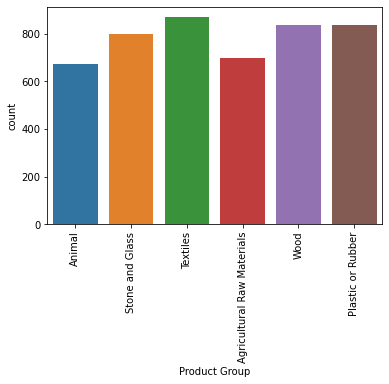

In [116]:
# What are the most popular product group category in the Canadian import dataset?

sns.countplot(x = 'Product Group',data=data3)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Animal'),
  Text(1, 0, 'Stone and Glass'),
  Text(2, 0, 'Textiles'),
  Text(3, 0, 'Agricultural Raw Materials'),
  Text(4, 0, 'Wood'),
  Text(5, 0, 'Plastic or Rubber')])

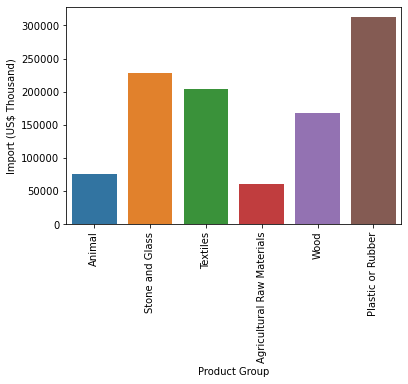

In [117]:
sns.barplot(x= 'Product Group', y= 'Import (US$ Thousand)', data = data3,  ci=None)
plt.xticks(rotation=90)

(array([0]), [Text(0, 0, 'Canada')])

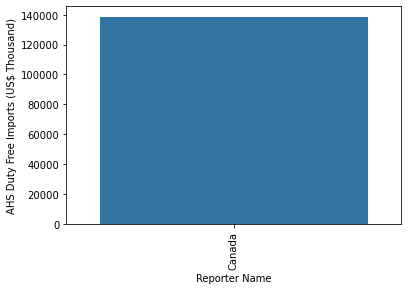

In [118]:
# Which type of tariff ( AHS or MFN ) is best for traders ?

sns.barplot(x= 'Reporter Name',y = 'AHS Duty Free Imports (US$ Thousand)',data=data3, ci =None)

plt.xticks(rotation=90)

(array([0]), [Text(0, 0, 'Canada')])

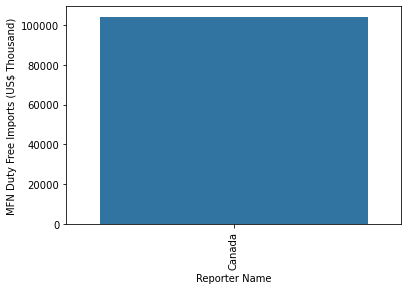

In [119]:
sns.barplot(x= 'Reporter Name',y = 'MFN Duty Free Imports (US$ Thousand)',data=data3, ci =None)

plt.xticks(rotation=90)

(array([0]), [Text(0, 0, 'Canada')])

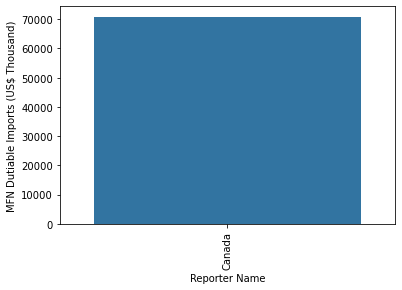

In [120]:
sns.barplot(x= 'Reporter Name',y = 'MFN Dutiable Imports (US$ Thousand)',data=data3, ci =None)

plt.xticks(rotation=90)

(array([0]), [Text(0, 0, 'Canada')])

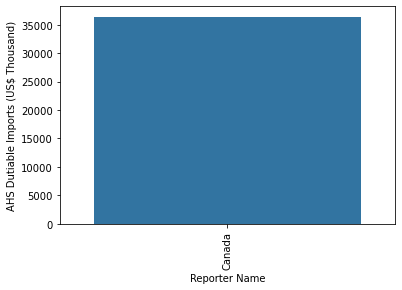

In [121]:
sns.barplot(x= 'Reporter Name',y = 'AHS Dutiable Imports (US$ Thousand)',data=data3, ci =None)

plt.xticks(rotation=90)

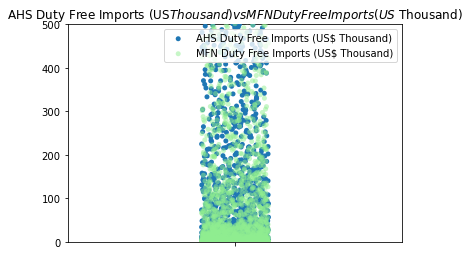

In [152]:
#In which price range there is a maximum possibility of duty free imports in Canada?
sns.stripplot(y = data3['AHS Duty Free Imports (US$ Thousand)'])
sns.stripplot(y = data3['MFN Duty Free Imports (US$ Thousand)'], color='lightgreen', alpha = 0.5)

plt.ylim(0,500)


plt.ylabel(" ")
plt.title("AHS Duty Free Imports (US$ Thousand) vs MFN Duty Free Imports (US$ Thousand)")

plt.legend(["AHS Duty Free Imports (US$ Thousand)","MFN Duty Free Imports (US$ Thousand)"])


(501.0, 12791095.0)

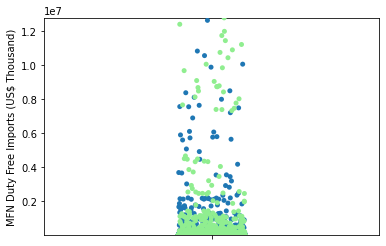

In [125]:
sns.stripplot(y = data['AHS Duty Free Imports (US$ Thousand)'])
sns.stripplot(y = data['MFN Duty Free Imports (US$ Thousand)'], color= 'lightgreen')
plt.ylim(501,12791095)

D:\New folder\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


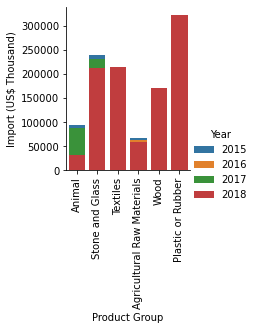

In [126]:
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(data3, hue ='Year')
# map the above form facetgrid with some attributes
graph.map(sns.barplot, "Product Group", "Import (US$ Thousand)",ci = None).add_legend()
plt.xticks(rotation=90)
# show the object
plt.show()

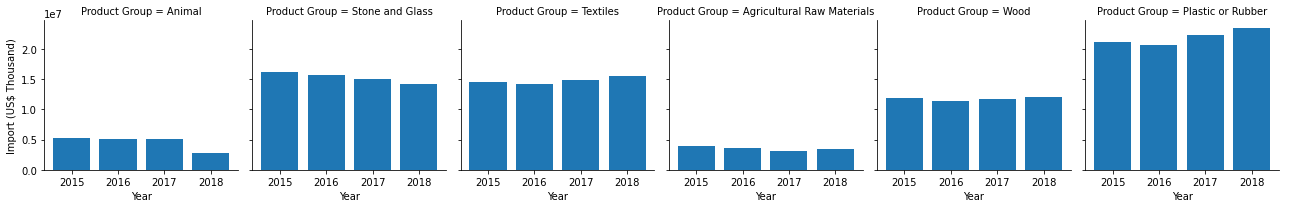

In [127]:
### Form a facetgrid using columns with a hue


graph = sns.FacetGrid(data3,col ='Product Group')

# map the above form facetgrid with some attributes
graph.map(plt.bar, "Year", "Import (US$ Thousand)").add_legend()
#plt.xticks(rotation=90)
# show the object
plt.show()

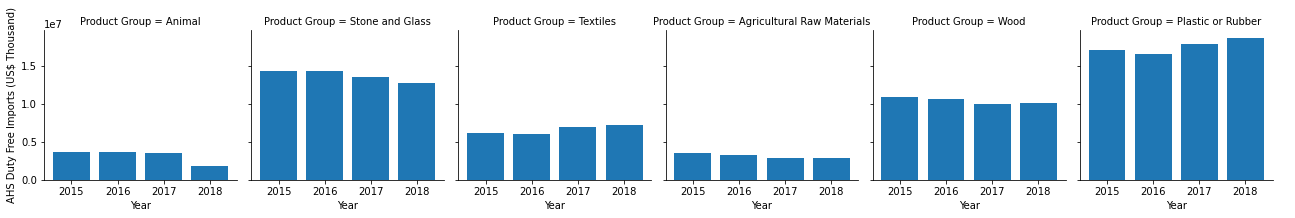

In [128]:
### AHS(Effectively Applied Tariff) across the years
graph2 = sns.FacetGrid(data3,col ='Product Group')

# map the above form facetgrid with some attributes
graph2.map(plt.bar, "Year", "AHS Duty Free Imports (US$ Thousand)").add_legend()
#plt.xticks(rotation=90)
# show the object
plt.show()

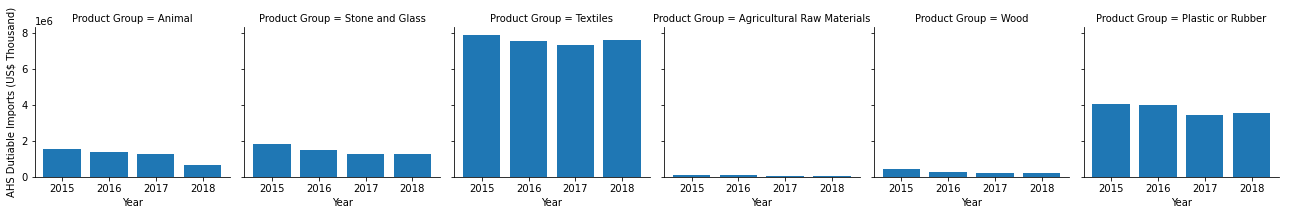

In [129]:
### AHS(Effectively Applied Tariff) across the years

graph5 = sns.FacetGrid(data3,col ='Product Group')

# map the above form facetgrid with some attributes
graph5.map(plt.bar, "Year", "AHS Dutiable Imports (US$ Thousand)").add_legend()
#plt.xticks(rotation=90)
# show the object
plt.show()

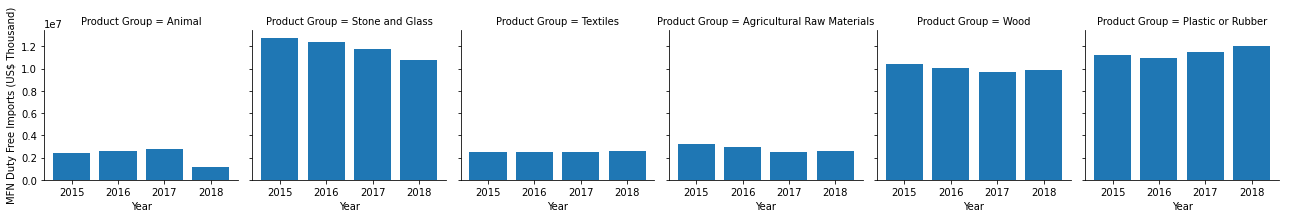

In [130]:
### MFN(Most Favoured Nation Tariff) across the years

graph3 = sns.FacetGrid(data3,col ='Product Group')

# map the above form facetgrid with some attributes
graph3.map(plt.bar, "Year", "MFN Duty Free Imports (US$ Thousand)").add_legend()
#plt.xticks(rotation=90)
# show the object
plt.show()

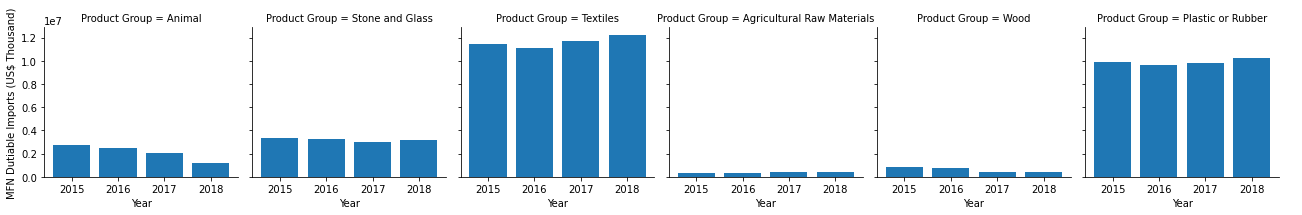

In [131]:
### MFN(Most Favoured Nation Tariff) across the years

graph4 = sns.FacetGrid(data3,col ='Product Group')

# map the above form facetgrid with some attributes
graph4.map(plt.bar, "Year", "MFN Dutiable Imports (US$ Thousand)").add_legend()
#plt.xticks(rotation=90)
# show the object
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Mexico'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Bangladesh'),
  Text(6, 0, 'Vietnam'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Argentina'),
  Text(9, 0, 'Italy')])

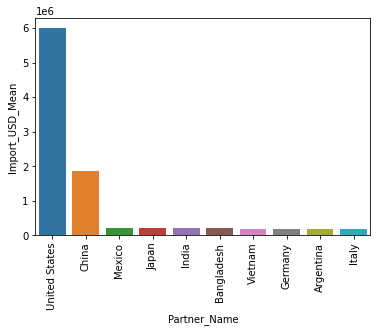

In [141]:
### Top 10 countries with average Import USD

sns.barplot(x = 'Partner_Name', y = 'Import_USD_Mean',data=TopCountries_with_importUSdMean)
plt.xticks(rotation=90)